# Linear Regression

 Based on the data provided (Time spent on App,Time spent on website), we need to decide whether the company should focus on their App or Website.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_palette("GnBu_d")
sns.set_style('darkgrid')

In [3]:
ecom = pd.read_csv('Ecommerce Customers')
ecom.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
ecom.shape

(500, 8)

In [5]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
ecom.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Exploratory Data Analysis

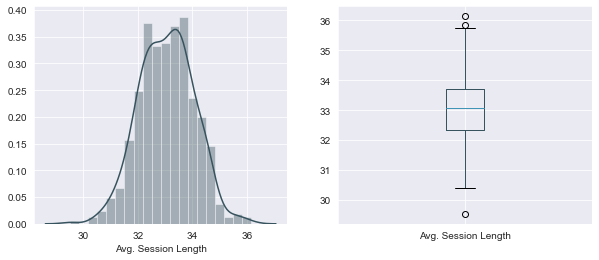

In [7]:
fig = plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(ecom['Avg. Session Length'])
plt.subplot(122)
ecom['Avg. Session Length'].plot.box()

We see that the distribution is fairly normal which is good for making predictions.
Also, the number of outliers present are very less.

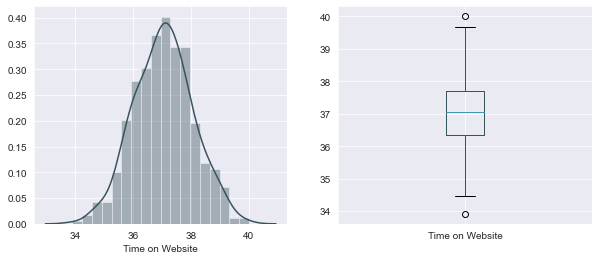

In [8]:
fig = plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(ecom['Time on Website'])
plt.subplot(122)
ecom['Time on Website'].plot.box()

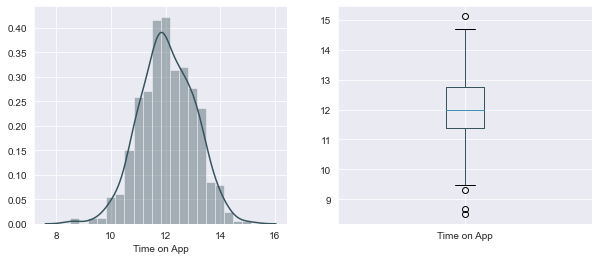

In [9]:
fig = plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(ecom['Time on App'])
plt.subplot(122)
ecom['Time on App'].plot.box()

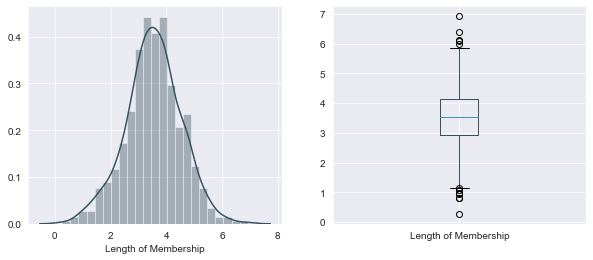

In [10]:
fig = plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(ecom['Length of Membership'])
plt.subplot(122)
ecom['Length of Membership'].plot.box()

There are quite a few outliers for Length of Membership which will be treated later.

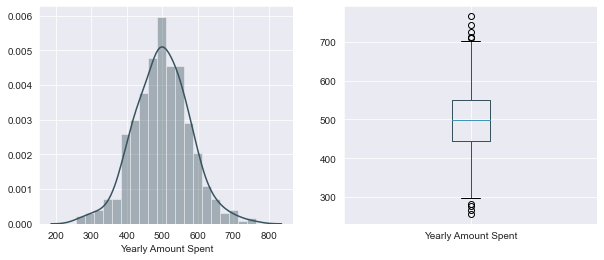

In [11]:
fig = plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(ecom['Yearly Amount Spent'])
plt.subplot(122)
ecom['Yearly Amount Spent'].plot.box()

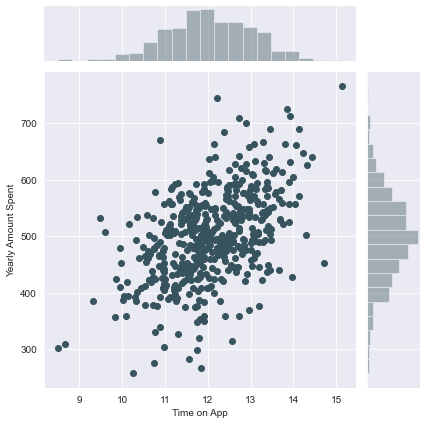

In [12]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=ecom)

We can infer that the Time on App and Yearly Amount Spent is positively correlated.

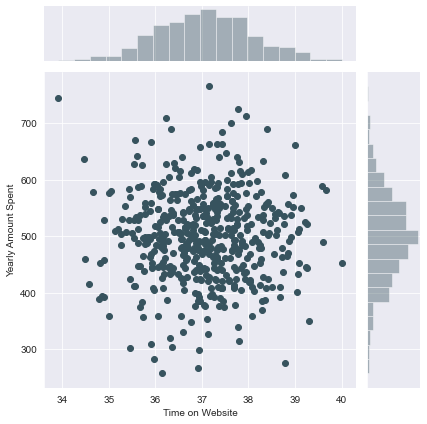

In [13]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=ecom)

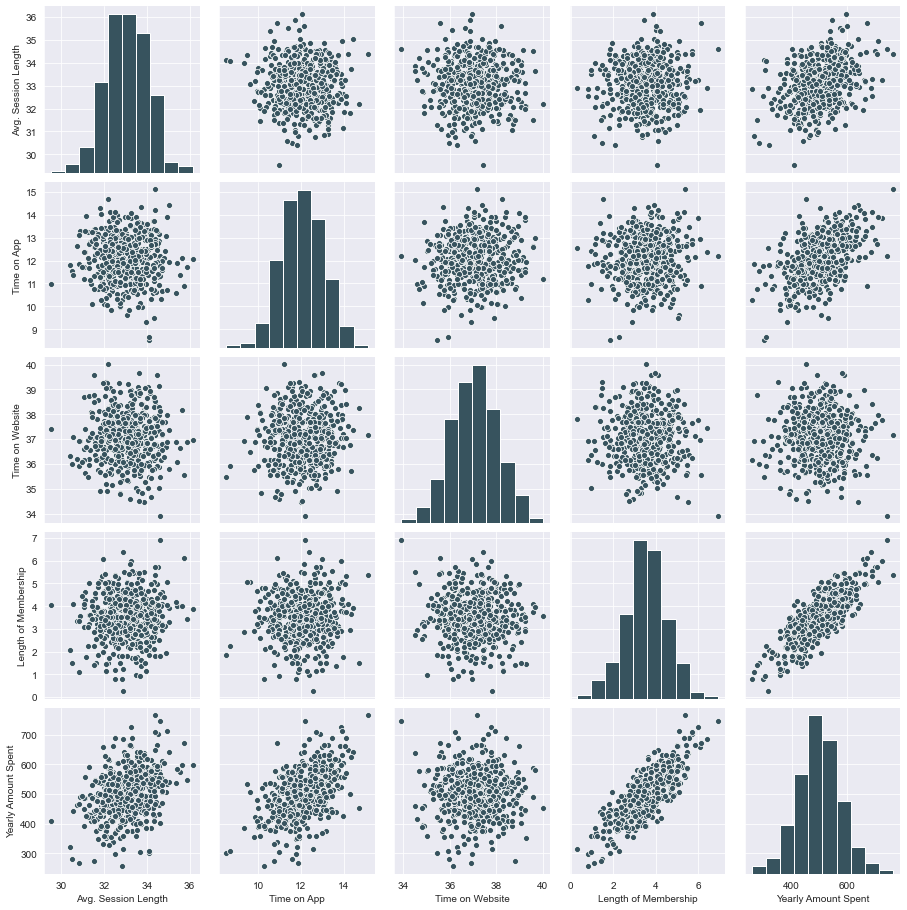

In [14]:
sns.pairplot(data=ecom)

Based on the above visualisations, we can infer that the Length of Membership is the most correlated feature with Yearly Amount Spent.

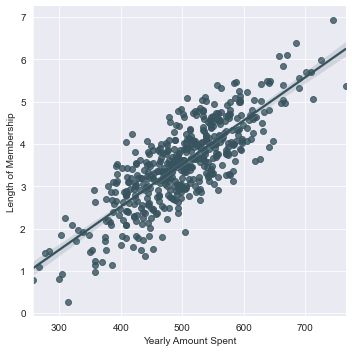

In [15]:
sns.lmplot(x='Yearly Amount Spent',y='Length of Membership',data=ecom)

# Model Building

In [16]:
X = ecom[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = ecom['Yearly Amount Spent']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lreg = LinearRegression()

In [21]:
lreg.fit(X_train,y_train)

LinearRegression()

In [22]:
predictions = lreg.predict(X_test)

Text(0, 0.5, 'Predicted Y')

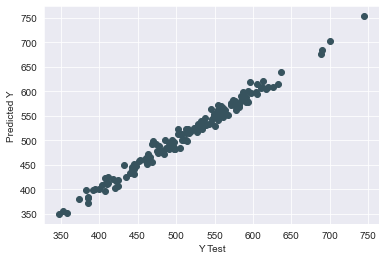

In [23]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [24]:
from sklearn import metrics

print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 7.947295656256035
MSE: 96.89620886022385
RMSE: 9.84358719472855


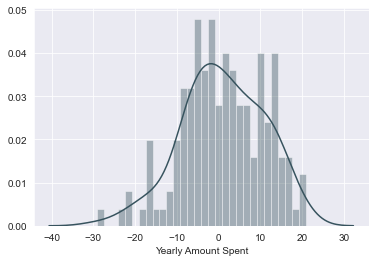

In [25]:
sns.distplot((y_test-predictions),bins=30)

# Conclusion

In [27]:
coeff = pd.DataFrame(lreg.coef_,X.columns,columns=['Coefficients'])
coeff

,Coefficients
Avg. Session Length,25.262939
Time on App,38.396373
Time on Website,0.187358
Length of Membership,61.898710


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.